In [1]:
import numpy as np 
import pandas as pd

df = pd.read_csv('kidney_disease.csv')

In [2]:
df.shape

(400, 26)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [7]:
# Dropping the id column
df.drop(["id"],axis=1,inplace=True) 

In [8]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
anemia                       1
appetite                     1
pedal_edema                  1
classification               0
dtype: int64

In [9]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [10]:
# Numerical features:
print(numerical_features)

# Categorical features:
print(categorical_features)

['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


In [11]:
# Replace incorrect values

df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [12]:
df1 = df
df1 = df1.dropna()

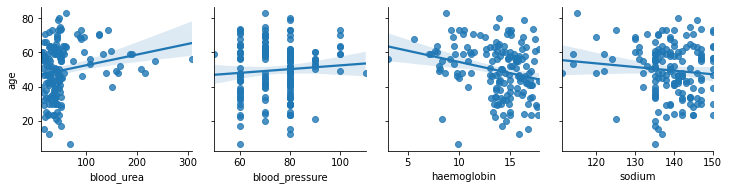

In [13]:
sns.pairplot(df1, 
             x_vars = ['blood_urea', 'blood_pressure',
                      'haemoglobin', 'sodium'], 
             y_vars = 'age', 
             kind   = "reg" )

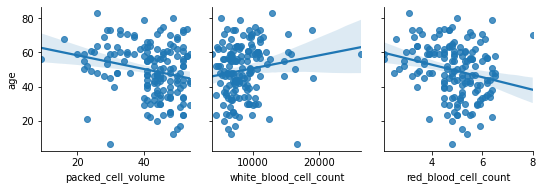

In [14]:
sns.pairplot(df1, 
             x_vars = ['packed_cell_volume', 
                       'white_blood_cell_count', 'red_blood_cell_count'], 
             y_vars = 'age', 
             kind   = "reg" )

In [29]:
feature_cols = ['blood_urea', 'haemoglobin', ##h
                'sodium', 'packed_cell_volume', ##pcv
                'white_blood_cell_count', 
                'red_blood_cell_count',
               'blood_pressure'     ##bp
               ]

feature_cols = ['packed_cell_volume']

x = df1[feature_cols]
y = df1['age']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [31]:
from sklearn.linear_model import LinearRegression



linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [32]:
print(linreg.intercept_)
print(linreg.coef_)
zip(feature_cols, linreg.coef_)

69.67808324374137
[-0.49573798]


In [33]:
y_pred = linreg.predict(x_test)

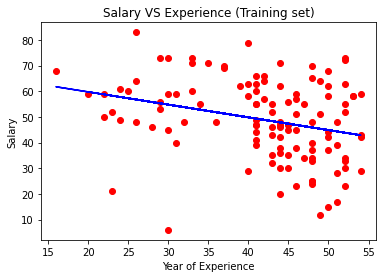

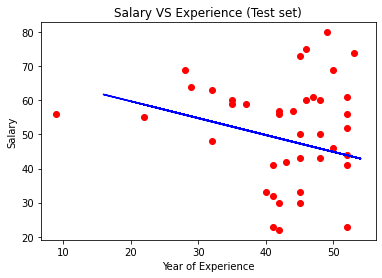

In [34]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(x_train, y_train, color='red')
viz_train.plot(x_train, linreg.predict(x_train), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(x_test, y_test, color='red')
viz_test.plot(x_train, linreg.predict(x_train), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

In [35]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

12.757238711411457
238.89901483356965
15.456358394963855


In [37]:
from sklearn import linear_model
import statsmodels.api as sm

X = df1[['haemoglobin', 'packed_cell_volume']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df1['age']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Index: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 68.42835942005769
Coefficients: 
 [-0.89459107 -0.15794023]
Predicted Index: 
 [65.13115076]
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     5.178
Date:                Sat, 06 Feb 2021   Prob (F-statistic):            0.00666
Time:                        22:39:39   Log-Likelihood:                -651.76
No. Observations:                 158   AIC:                             1310.
Df Residuals:                     155   BIC:                             1319.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------